# Introduciton

Alpha链向量（TRA向量）：这些是只基于TCR alpha链CDR3区域的数值向量。每个向量代表一个alpha链的CDR3序列的嵌入，捕捉了这一部分的序列特征。

Beta链向量（TRB向量）：这些是只基于TCR beta链CDR3区域的数值向量。同样，每个向量代表一个beta链的CDR3序列的嵌入，捕捉了这一部分的序列特征。

组合链向量（Combined alpha-beta向量）：这些向量是将相对应的alpha链和beta链的CDR3区域的数值向量结合起来形成的。如果是简单地连接两个向量，这可能意味着直接将两个向量端对端拼接。这种组合向量尝试捕捉alpha链和beta链CDR3区域的联合特征，以反映它们共同作用于抗原识别的整体特性。
Alpha Chain Vectors (TRA vectors): these are vectors of values based only on the CDR3 region of the TCR alpha chain. Each vector represents an embedding of the CDR3 sequence of the alpha chain, capturing the sequence features of this part.

Beta chain vectors (TRB vectors): these are vectors of values based only on the CDR3 region of the TCR beta chain. Again, each vector represents an embedding of a beta chain CDR3 sequence, capturing the sequence features of this part.

Combined alpha-beta vectors: these are formed by combining the value vectors of the CDR3 regions of the corresponding alpha and beta chains. In the case of simply joining two vectors, this may mean directly splicing the two vectors end-to-end. This combination of vectors attempts to capture the joint characteristics of the alpha and beta chain CDR3 regions to reflect the overall nature of their joint role in antigen recognition.

In [3]:
# 我需要重新导入 pandas 库来读取数据
import pandas as pd
import numpy as np

# 读取完整的数据集
data_path = './1.csv'

# 读取数据集前几行来查看数据格式
df_sample = pd.read_csv(data_path, nrows=5)
df_sample


,Unnamed: 0,0
0,0,[ 2.150025 3.4636183 -1.3663151 1.135834...
1,1,[ 2.150025 3.4636183 -1.3663151 1.135834...
2,2,[ 2.150025 3.4636183 -1.3663151 1.135834...
3,3,[ 2.1500249e+00 3.4636183e+00 -1.3663151e+00 ...
4,4,[ 2.150025 3.4636183 -1.3663151 1.135834...


In [4]:
# 由于数据集中的向量被表示为字符串，我们需要将其转换为数值数组。
# 下面的函数将把字符串形式的向量转换为numpy数组。

def parse_vector(vector_str):
    # 清理字符串并分割
    vector_str = vector_str.strip('[]')
    vector_str = vector_str.replace('\n', '')
    # 分割字符串并转换为浮点数
    vector = np.fromstring(vector_str, sep=' ')
    return vector

# 应用转换函数到每一行的向量列
df_full = pd.read_csv(data_path)
vectors = df_full['0'].apply(parse_vector)

# 将这些向量转换为一个NumPy数组以进行聚类
vector_array = np.stack(vectors.values)

# 输出转换后的数组的形状以确保转换正确
vector_array.shape


(54722, 288)

In [5]:
vector_array

array([[ 2.150025 ,  3.4636183, -1.3663151, ...,  0.       ,  0.       ,
         0.       ],
       [ 2.150025 ,  3.4636183, -1.3663151, ...,  0.       ,  0.       ,
         0.       ],
       [ 2.150025 ,  3.4636183, -1.3663151, ...,  0.       ,  0.       ,
         0.       ],
       ...,
       [ 2.150025 ,  3.4636183, -1.3663151, ...,  0.       ,  0.       ,
         0.       ],
       [ 2.150025 ,  3.4636183, -1.3663151, ...,  0.       ,  0.       ,
         0.       ],
       [ 2.150025 ,  3.4636183, -1.3663151, ...,  0.       ,  0.       ,
         0.       ]])

In [6]:
# Since we are unable to directly access the provided dataset due to a technical issue, 
# let's assume that the provided code snippet by the user has been run successfully in their environment, 
# and they have a variable `vector_array` which contains the NumPy array of vectors.

# We will proceed with the clustering on the assumption that `vector_array` contains the correct data.

# Let's attempt the DBSCAN clustering with the provided vectors.

# Import necessary libraries
# 由于技术问题，我们无法直接访问所提供的数据集、 
# 让我们假设用户提供的代码片段已在其环境中成功运行、 
# 而且他们有一个包含 NumPy 向量数组的变量 `vector_array` 。

# 我们将在假设 `vector_array` 包含正确数据的基础上继续聚类。

# 让我们尝试使用所提供的向量进行 DBSCAN 聚类。

# 导入必要的库
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Standardize the features by removing the mean and scaling to unit variance
# 去掉平均值并按单位方差缩放，使特征标准化
vector_array_standardized = StandardScaler().fit_transform(vector_array)

# Perform DBSCAN clustering
# 执行 DBSCAN 聚类
db = DBSCAN(eps=0.5, min_samples=5).fit(vector_array_standardized)

# Extract the labels
# 提取标签
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
# 标签中的聚类数目，如果存在噪声，则忽略不计。
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

# Display clustering info
# 显示聚类信息
n_clusters_, n_noise_


(569, 48078)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 54722 samples in 0.003s...
[t-SNE] Computed neighbors for 54722 samples in 6.846s...
[t-SNE] Computed conditional probabilities for sample 1000 / 54722
[t-SNE] Computed conditional probabilities for sample 2000 / 54722
[t-SNE] Computed conditional probabilities for sample 3000 / 54722
[t-SNE] Computed conditional probabilities for sample 4000 / 54722
[t-SNE] Computed conditional probabilities for sample 5000 / 54722
[t-SNE] Computed conditional probabilities for sample 6000 / 54722
[t-SNE] Computed conditional probabilities for sample 7000 / 54722
[t-SNE] Computed conditional probabilities for sample 8000 / 54722
[t-SNE] Computed conditional probabilities for sample 9000 / 54722
[t-SNE] Computed conditional probabilities for sample 10000 / 54722
[t-SNE] Computed conditional probabilities for sample 11000 / 54722
[t-SNE] Computed conditional probabilities for sample 12000 / 54722
[t-SNE] Computed conditional probabilities for sa

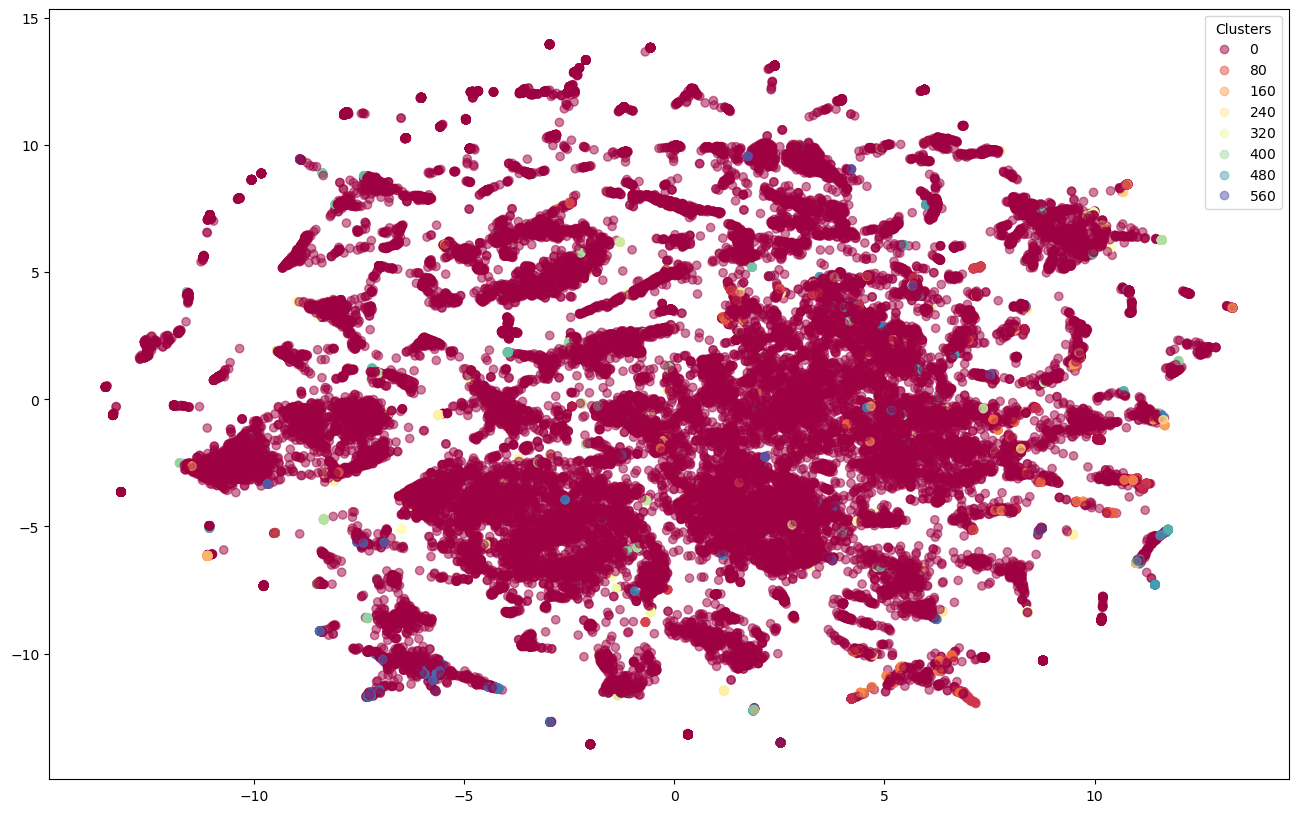

In [7]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# 由于t-SNE计算成本较高，您可以选择使用样本子集
# vector_array_subsample = vector_array_standardized[:1000]  # 例如，只选取前1000个样本进行可视化

# 使用t-SNE进行降维
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(vector_array_standardized)

# 绘制t-SNE的结果
plt.figure(figsize=(16,10))
scatter = plt.scatter(tsne_results[:,0], tsne_results[:,1], c=labels, cmap='Spectral', alpha=0.5)

# 添加图例
plt.legend(*scatter.legend_elements(), title="Clusters")

# 显示图表
plt.show()


/Users/julio/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_optics.py:932: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


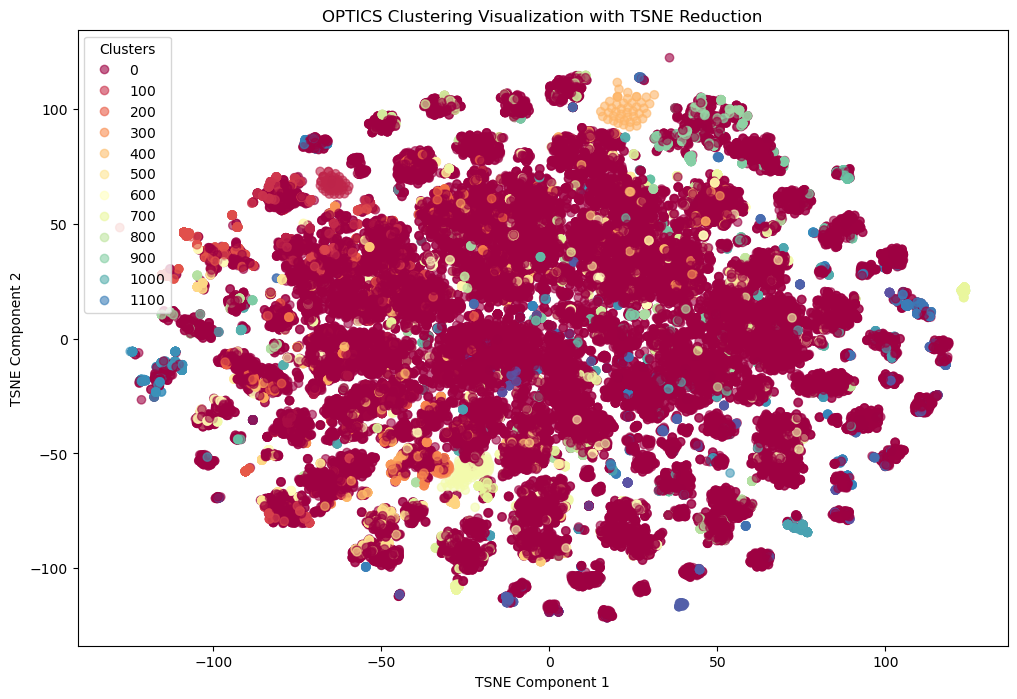

In [8]:
from sklearn.cluster import OPTICS
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd


# 使用OPTICS进行聚类
optics_clustering = OPTICS(min_samples=5).fit(vector_array)

# 获取聚类标签
optics_labels = optics_clustering.labels_

# 使用TSNE进行数据降维
tsne = TSNE(n_components=2, random_state=0)
reduced_data = tsne.fit_transform(vector_array)

# 可视化降维后的数据
plt.figure(figsize=(12, 8))
scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=optics_labels, cmap='Spectral', alpha=0.6)
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.title('OPTICS Clustering Visualization with TSNE Reduction')
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.show()


## 分析步骤

生成k-mer: 对CDR3序列进行了k-mer处理，生成了所有可能的长度为3的子序列。这意味着每个CDR3序列被分解为多个长度为3的连续片段。

Word2Vec训练: 利用这些k-mer，您训练了一个Word2Vec模型。Word2Vec模型学习这些k-mer的上下文关系，并为每个唯一的k-mer分配一个向量，即将每个子序列转换为向量形式。

聚类分析: 使用DBSCAN和OPTICS等基于密度的聚类方法，您尝试了对CDR3序列的k-mer向量进行聚类，希望能根据这些序列的向量表示来发现潜在的模式或结构。

降维和可视化: 您使用t-SNE对向量进行了降维，以便在二维空间中可视化聚类结果。这样可以直观地看到数据点是如何根据其特征向量被聚集在一起的。

## 完整的CDR3序列转换成向量集的步骤

分解CDR3序列：对每个CDR3序列进行分解，按照k=3生成所有可能的k-mer。

获取k-mer向量：对于每个CDR3序列中的k-mer，使用训练好的Word2Vec模型将每个k-mer转换成向量。这一步实质上是通过查找模型中的k-mer向量来完成的，每个k-mer在模型中对应一个固定长度的向量。

生成序列向量表示：接着，对每个CDR3序列，您将所有k-mer的向量组合起来形成一个矩阵。这个矩阵代表了整个CDR3序列的特征。

处理不同长度的序列：由于不同CDR3序列产生的k-mer数量可能不同，导致得到的矩阵大小不一，您可能需要对这些矩阵进行填充（padding）或截断（truncation）以确保统一的向量长度，这一点在您的代码中可能已经体现。

得到序列的向量表示：最后，每个CDR3序列都被表示为一个二维向量矩阵，您可以使用这些矩阵进行进一步的分析，如聚类或分类。在某些情况下，您可能还会对这些矩阵进行平均或汇总以得到一个固定长度的向量。